# Assignment 3: Exploratory Data Analysis
### Joe Leonard (ymd3tv) - DS 3001

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
- $m(a+bX) = \frac{1}{N} \sum_{i=1}^N (a + b x_i)$
- $= \frac{1}{N} \left( \sum_{i=1}^N a + \sum_{i=1}^N b x_i \right)$
- $= \frac{1}{N}(Na + b \sum_{i=1}^N x_i)$
- $= a + b \times m(X)$

2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
- $\text{cov}(X,a+bY) = \frac{1}{N}\sum_{i=1}^N (x_i - m(X))((a+b y_i) - m(a+bY))$
- $= \frac{1}{N}\sum_{i=1}^N (x_i - m(X))(b(y_i - m(Y)))$
- $= b \times \frac{1}{N}\sum_{i=1}^N (x_i - m(X))(y_i - m(Y))$
- $= b \times \text{cov}(X,Y)$

3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
- $\text{cov}(a+bX,a+bX) = \frac{1}{N}\sum_{i=1}^N ((a+b x_i)-m(a+bX))((a+b x_i)-m(a+bX))$
- $= \frac{1}{N}\sum_{i=1}^N (b(x_i - m(X)))^2$
- $= b^2 \times \frac{1}{N}\sum_{i=1}^N (x_i - m(X))^2$
- $= b^2 s^2$

4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
- A non-decreasing transformation $g$ preserves the order of the data. Since the median is the middle value when data is ordered, applying a non-decreasing transformation to each value maintains their relative order. Therefore, the median of $g(X)$ is $g($median$(X))$.
- This also applies to any quantile, since quantiles are based on the order of the data, not the specific values. However, for measures like the IQR or range, which depend on subtraction, the transformation must be linear (of the form $a + bX$) to ensure these measures scale accordingly.

5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?
- No, it is not always true that $m(g(X)) = g(m(X))$. 
- The mean is sensitive to the magnitude of each value, not just their order. Non-linear transformations can alter the distribution asymmetrically, so $g(m(X))$ will not generally be equal to $m(g(X))$ unless $g$ is a linear function.


**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.

In [1]:
import pandas as pd

# Loading in the Data
fin_data = pd.read_csv('./data/ForeignGifts_edu.csv')

2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

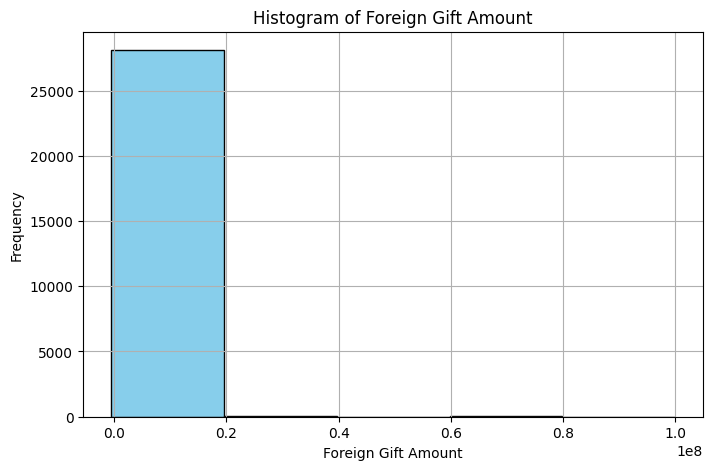

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fin_data['Foreign Gift Amount'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There is too much of a cluster between 0.0 and 0.2 for gift amount. What this shows is that there are some outliers that may be messing with out data that once we get rid of, we'll have more of a normal distribution.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [9]:
# Value Counts Table
gift_counts = fin_data['Gift Type'].value_counts()
print(gift_counts)

# Printing Proportions
gift_proportions = fin_data['Gift Type'].value_counts(normalize=True) * 100
print(gift_proportions)


Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type
Contract         61.209737
Monetary Gift    38.751285
Real Estate       0.038978
Name: proportion, dtype: float64


Based on the value counts:

- Contracts: 61.2%
- Real Estate: 0.04%
- Monetary Gifts: 38.8%

Contracts are the most common type, accounting for the largest proportion of the data, while real estate gifts are the least frequent. This distribution indicates that most foreign contributions do not involve property and are instead made from formal contracts.


4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

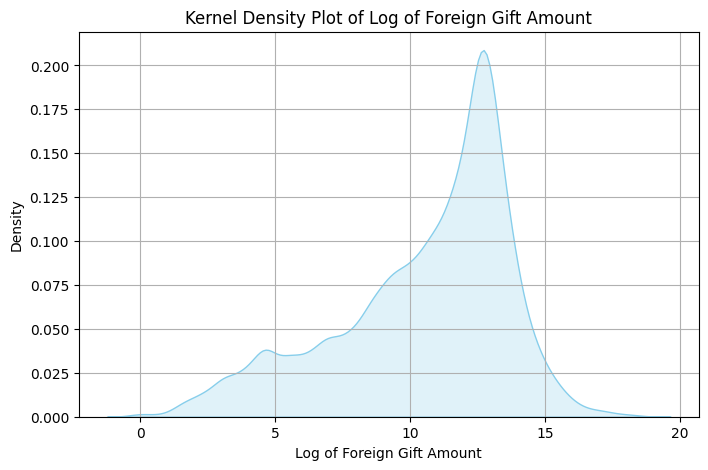

In [11]:
import numpy as np
import seaborn as sns

fin_data = fin_data[fin_data['Foreign Gift Amount'] > 0]
plt.figure(figsize=(8, 5))
sns.kdeplot(np.log(fin_data['Foreign Gift Amount']), fill=True, color='skyblue')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

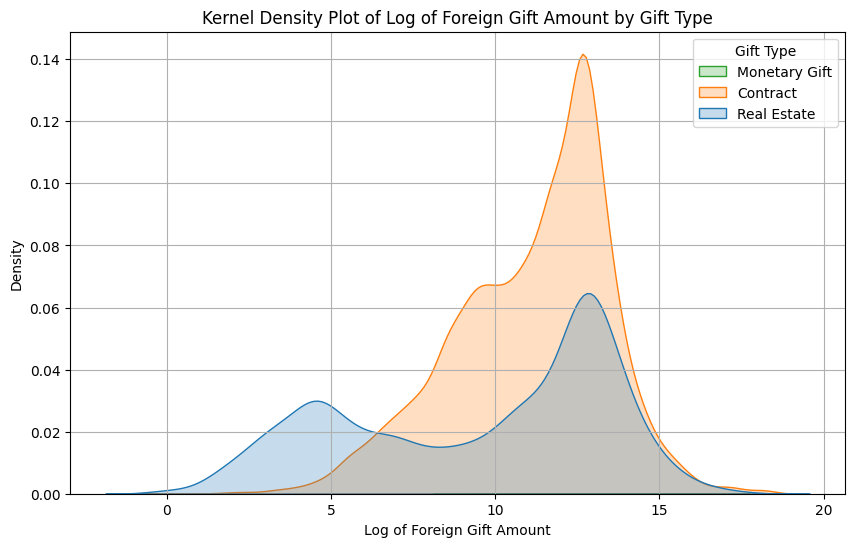

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fin_data, x=np.log(fin_data['Foreign Gift Amount']), hue='Gift Type', fill=True, legend=True)
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.grid(True)
plt.legend(title='Gift Type', labels=fin_data['Gift Type'].unique())
plt.show()

It seems as though the 'Contract' gifts are what makes up most of the graph when not dividing by gift type. This makes a lot of sense as we calculated earlier that 62% of gifts are contracts. We also can't find 'Monetary Gifts' which is interesting as we calculated they make up ~31% of gifts given. 

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [15]:
# Top 15 Countries in Number of Gifts
top_15_gift_count = fin_data['Country of Giftor'].value_counts().head(15)
print(top_15_gift_count)

Country of Giftor
ENGLAND            3654
CHINA              2461
CANADA             2344
JAPAN              1891
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1433
GERMANY            1393
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


In [ ]:
# Top 15 Countries in Amount Given
top_15_gift_amount = fin_data.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_gift_amount)


Country of Giftor
QATAR                   2706240869
ENGLAND                 1464933703
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    656325544
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442484396
UNITED ARAB EMIRATES     431396357
FRANCE                   405925834
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

In [17]:
# Top 15 Institutions by Amount Received
top_15_institutions = fin_data.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_institutions)


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


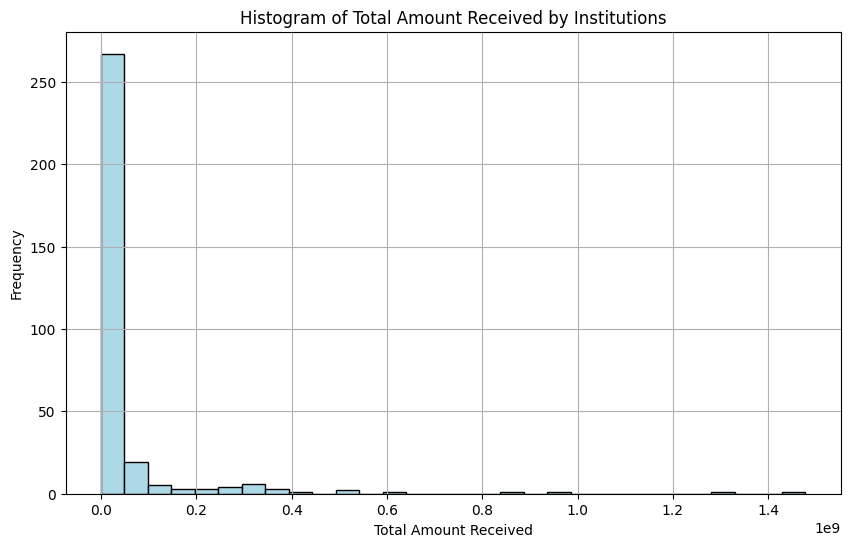

In [19]:
# Total Amount Received by All Institutions
institution_totals = fin_data.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(10, 6))
plt.hist(institution_totals, bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Which giftors provide the most money, in total?

In [20]:
# Top Giftor
top_giftors = fin_data.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  

In [22]:
import pandas as pd

# Loading in the Data
airbnb_data = pd.read_csv('./data/airbnb_hw.csv')

  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.

In [24]:
print("Dimensions of Dataset:", airbnb_data.shape)
print("Number of Observations:", airbnb_data.shape[0])
print("Number of Variables:", airbnb_data.shape[1])

print(airbnb_data.head())

Dimensions of Dataset: (30478, 13)
Number of Observations: 30478
Number of Variables: 13
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Priva

3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [25]:
room_property_ct = pd.crosstab(airbnb_data['Room Type'], airbnb_data['Property Type'])
print(room_property_ct)

room_property_ct_prop = pd.crosstab(airbnb_data['Room Type'], airbnb_data['Property Type'], normalize='columns')
print(room_property_ct_prop)

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

Private rooms are more common than entire property rentals in Bed & Breakfasts and Houses, with 155 and 1,258 private room rentals respectively, compared to only 13 and 752 entire property rentals. Apartments have the highest number of entire property rentals (15,669), while shared rooms are rare across most property types, primarily found in apartments.

  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

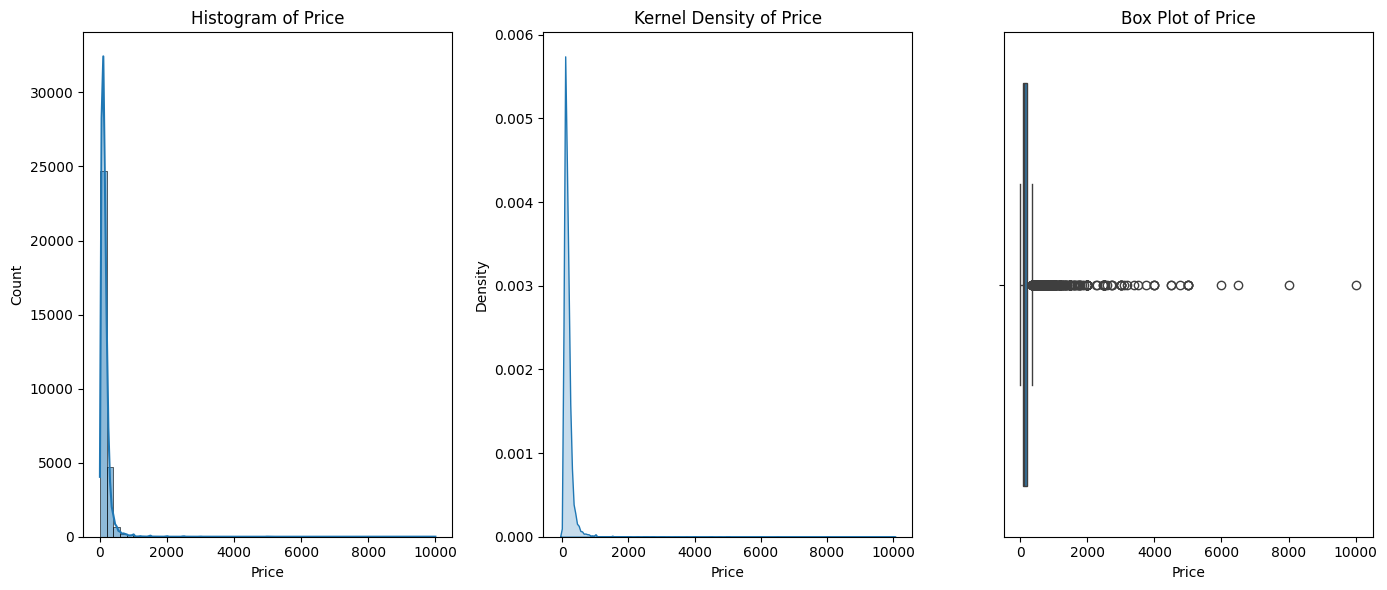

In [27]:
airbnb_data['Price'] = airbnb_data['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Histogram
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(airbnb_data['Price'], bins=50, kde=True)
plt.title('Histogram of Price')

# Kernel Density Plot
plt.subplot(1, 3, 2)
sns.kdeplot(airbnb_data['Price'], fill=True)
plt.title('Kernel Density of Price')

# Box Plot
plt.subplot(1, 3, 3)
sns.boxplot(x=airbnb_data['Price'])
plt.title('Box Plot of Price')

plt.tight_layout()
plt.show()

We can see from these plots that all of our data is very right-skewed which we can assume is due to a large outlier in the data.

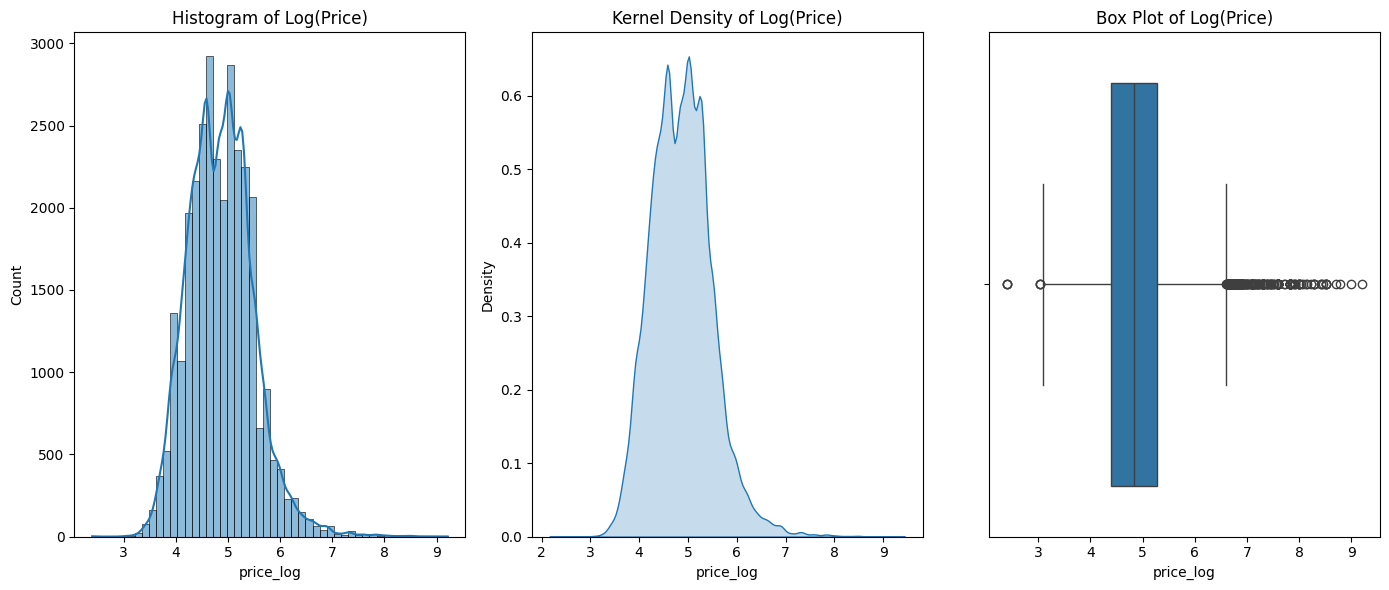

In [28]:
# Log Transformation
airbnb_data['price_log'] = np.log(airbnb_data['Price'] + 1)

# Histogram, KDE, and Box Plot after Log Transformation
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.histplot(airbnb_data['price_log'], bins=50, kde=True)
plt.title('Histogram of Log(Price)')

plt.subplot(1, 3, 2)
sns.kdeplot(airbnb_data['price_log'], fill=True)
plt.title('Kernel Density of Log(Price)')

plt.subplot(1, 3, 3)
sns.boxplot(x=airbnb_data['price_log'])
plt.title('Box Plot of Log(Price)')

plt.tight_layout()
plt.show()

Thanks to the log function, we can see a much better distribution in our data that allows us better analysis. We could face the issue of overfitting, but this is way easier to analyze than before.

  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

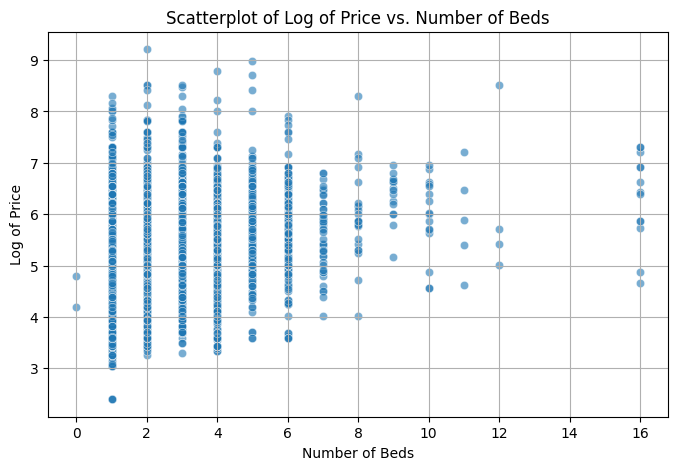

        count         mean          std    min     25%    50%      75%  \
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.21758

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=airbnb_data, x='Beds', y='price_log', alpha=0.6)
plt.title('Scatterplot of Log of Price vs. Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Log of Price')
plt.grid(True)
plt.show()

beds_group = airbnb_data.groupby('Beds')['Price'].describe()
print(beds_group)

As the number of beds increases, the average price of a property also increases. For instance, properties with 1 bed have an average price of around $127, while those with 12 beds average around $1,418. However, the variability (standard deviation) also increases as the number of beds increases, indicating that the price range becomes much broader for larger properties. For example, properties with 5 beds have a large standard deviation ($672), reflecting significant price variation, while properties with fewer beds (like 1 or 2) have lower price variability.

  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

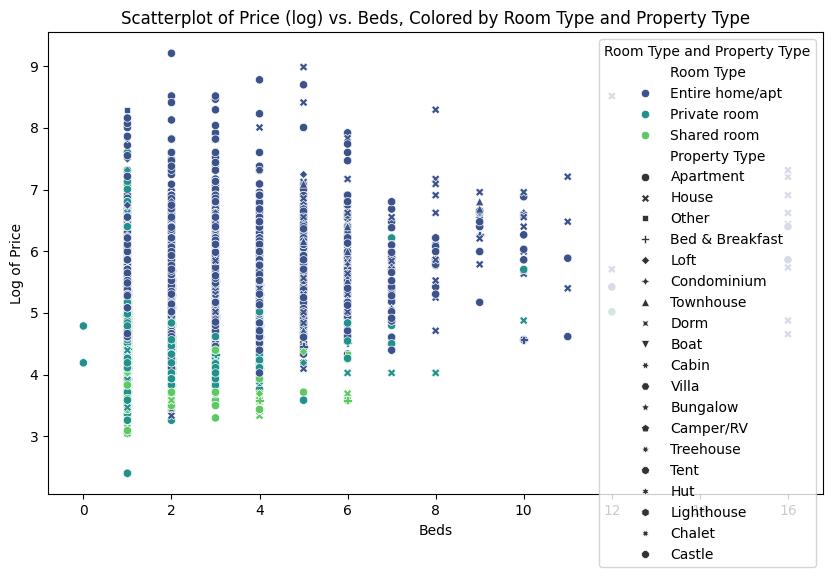

                                   count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
            

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=airbnb_data, x='Beds', y='price_log', hue='Room Type', style='Property Type', palette='viridis')
plt.title('Scatterplot of Price (log) vs. Beds, Colored by Room Type and Property Type')
plt.xlabel('Beds')
plt.ylabel('Log of Price')
plt.legend(title='Room Type and Property Type')
plt.show()

price_summary = airbnb_data.groupby(['Room Type', 'Property Type'])['Price'].describe()
print(price_summary)

The highest average price is found in the "Entire home/apt" and "Other" property type, with a mean of 843.43, but it also has the highest price variability (standard deviation of 1133.06). "Private room" generally has lower average prices, with more consistent price ranges across property types. The mean may not be the most reliable indicator of central tendency in categories like "Other" and "Villa," as the high standard deviations suggest that the median could provide a better estimate of typical prices.

  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

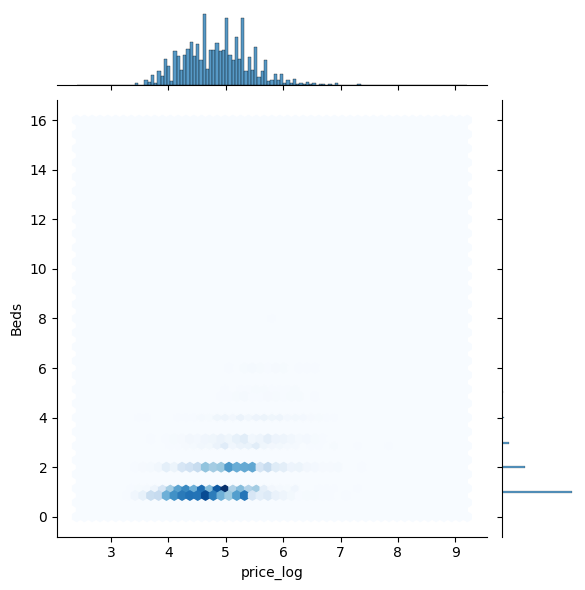

In [32]:
sns.jointplot(data=airbnb_data, x='price_log', y='Beds', kind='hex', cmap='Blues')
plt.show()

This reinforces my understanding from the previous scatterplots in 5 and 6. There are some outliers, but most of the data is densely packed. The hexbin plot helps clarify the general distribution of the data and suggests that the high variability in price might be due to sparse data points in higher price ranges. This also supports why the mean may not be the best measure of central tendency in cases of extreme outliers.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.

In [34]:
# Loading in the Data
drilling_data = pd.read_csv('./data/drilling_rigs.csv')

print(drilling_data.head())
print(f"Number of observations: {drilling_data.shape[0]}")
print(f"Number of variables: {drilling_data.shape[1]}")
print(drilling_data.dtypes)
print(drilling_data.info())

           Month  \
0   1973 January   
1  1973 February   
2     1973 March   
3     1973 April   
4       1973 May   

   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
0                                               1120                              
1                                               1037                              
2                                                959                              
3                                                914                              
4                                                974                              

   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
0                                                 99                               
1                                                 89                               
2                                                 90                               
3                                           

The dataset contains 623 observations and 10 variables, with three numeric columns and seven object-type columns that need cleaning. The Month column should be split into Year and Month, and columns with "Not Available" values should be replaced with NaN. The Active Well Service Rig Count column, currently an object type, should be converted to numeric after cleaning non-numeric characters.

2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.

In [35]:
drilling_data['time'] = pd.to_datetime(drilling_data['Month'], format='%Y %B')

3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.

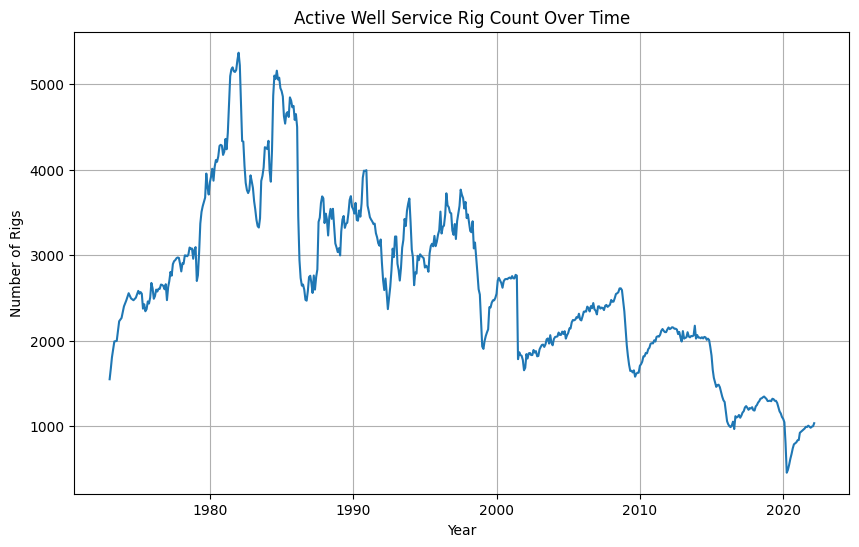

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(drilling_data['time'], pd.to_numeric(drilling_data['Active Well Service Rig Count (Number of Rigs)'], errors='coerce'))
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()

We can see that service rig count decreases over time, which makes sense as we have changed our perspective of oil-mining as a society and looke for more sustainable and efficient sources of energy. 

4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.

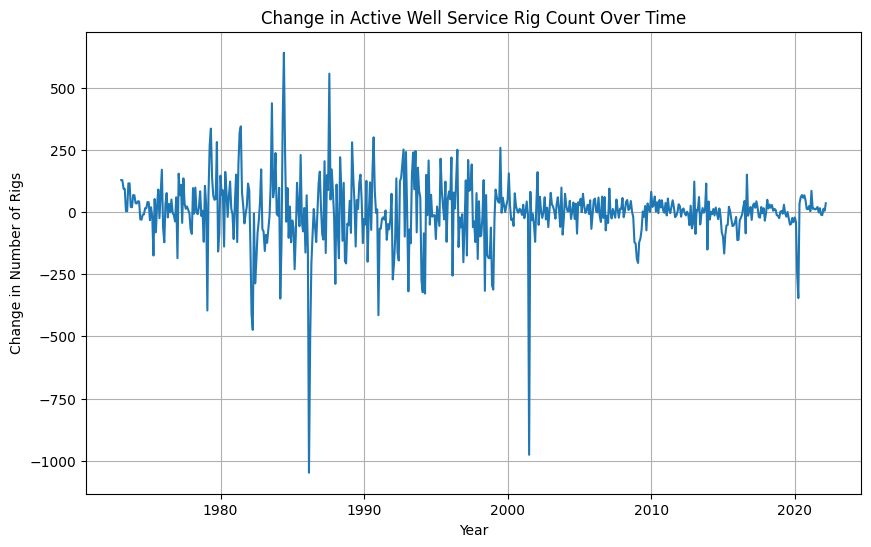

In [37]:
drilling_data['rig_count_diff'] = pd.to_numeric(drilling_data['Active Well Service Rig Count (Number of Rigs)'], errors='coerce').diff()

plt.figure(figsize=(10, 6))
plt.plot(drilling_data['time'], drilling_data['rig_count_diff'])
plt.title('Change in Active Well Service Rig Count Over Time')
plt.xlabel('Year')
plt.ylabel('Change in Number of Rigs')
plt.grid(True)
plt.show()

The first difference shows how the number of rigs changes from one period to the next. We can see there are random drops every 15 or so years which is interesting. There was a drop during 2020, which we can accredit to COVID as the reasoning most likely which slowed down production. This also follows the trend of decreasing active rigs as the peaks get smaller the more time has gone on.

5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

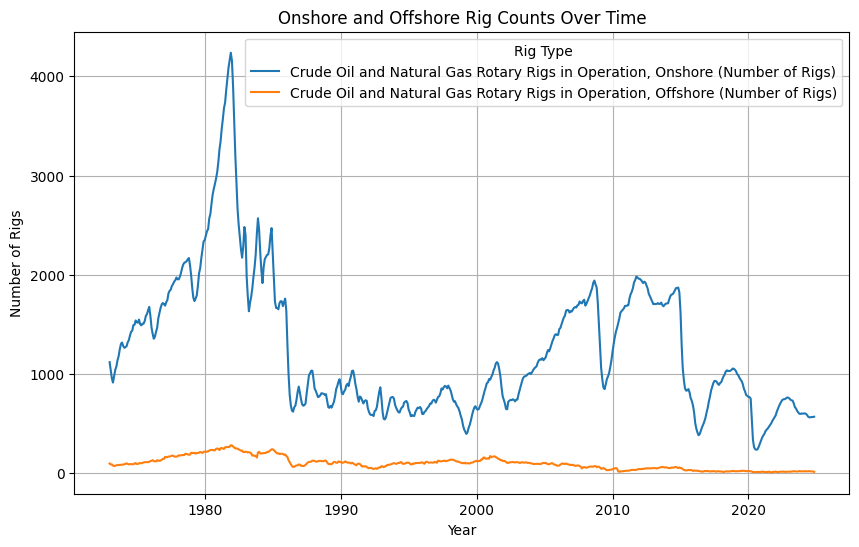

In [39]:
drilling_data_melted = drilling_data.melt(id_vars=['time'], 
                    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 
                                'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                    var_name='Rig Type', 
                    value_name='Number of Rigs')

plt.figure(figsize=(10, 6))
for rig_type in drilling_data_melted['Rig Type'].unique():
    subset = drilling_data_melted[drilling_data_melted['Rig Type'] == rig_type]
    plt.plot(subset['time'], pd.to_numeric(subset['Number of Rigs'], errors='coerce'), label=rig_type)

plt.title('Onshore and Offshore Rig Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Rigs')
plt.legend(title='Rig Type')
plt.grid(True)
plt.show()